<a href="https://colab.research.google.com/github/WinnieSue/Hotel-rerservation-prediction/blob/main/Hotel_reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Source of data : Kaggle (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) 

2) Brief description of data: Hotels receive multiple bookings froma a variety of clients. The information that the hotels collect from the client can assist to predict of a client will confirm booking or cancel.


3) What is the target? The target is booking status

4) Is this a classification or regression problem? It is a classification problem.

5) How many features? 19

6) How many rows of data. 36275

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

- the dataset is a bit unbalanced and tehrefore that is one problem that has to be dealt with.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# check the class balance
df['booking_status'].value_counts(normalize = True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [6]:
# find duplicated rows. there is none
df.duplicated().sum()

0

In [7]:
# Checking for any issues in categorical data
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [8]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [9]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

**produce univariate visuals for the target and all features**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-11-ded320505e81>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'no_of_children', data = df, ci = None);


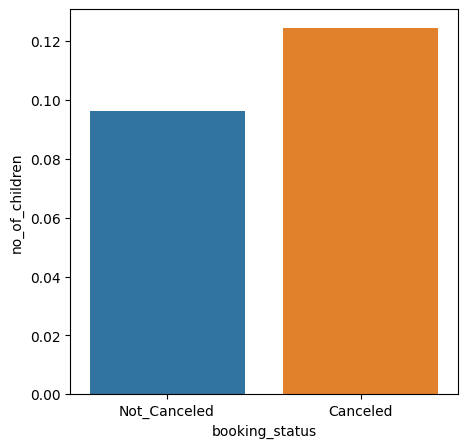

In [11]:
# Checking the booking status based on the number of chidren
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'booking_status', y = 'no_of_children', data = df, ci = None);

<ipython-input-12-151cb1392b62>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'no_of_adults', data = df, ci = None, hue = 'market_segment_type');


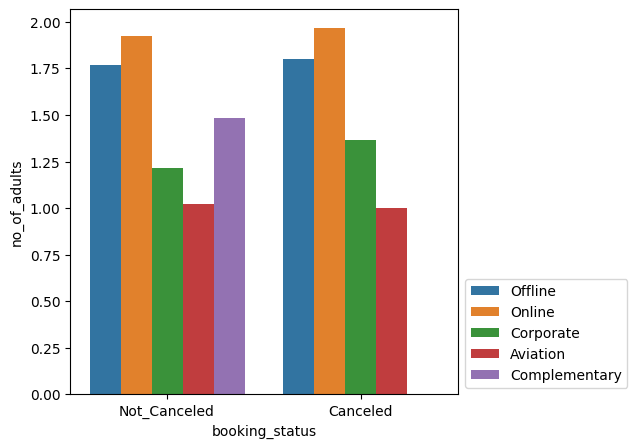

In [12]:
# Seeing the booking status based on market segment type of the person booking and number of adults
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'booking_status', y = 'no_of_adults', data = df, ci = None, hue = 'market_segment_type');
plt.legend(bbox_to_anchor=(1.02, 0.30), loc='upper left', borderaxespad=0)

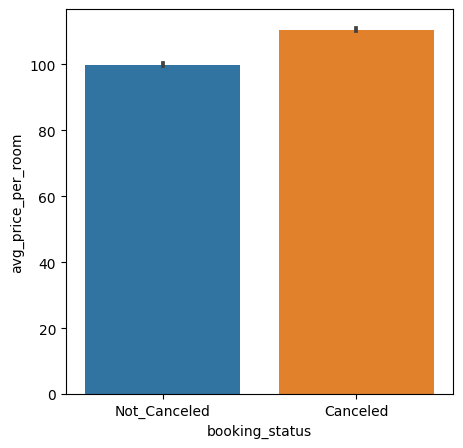

In [13]:
# booking status based on the avg price of the room
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df);

We can see here that for rooms above $100, there was mostly cancellations.

<ipython-input-14-84160829be9d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'room_type_reserved');


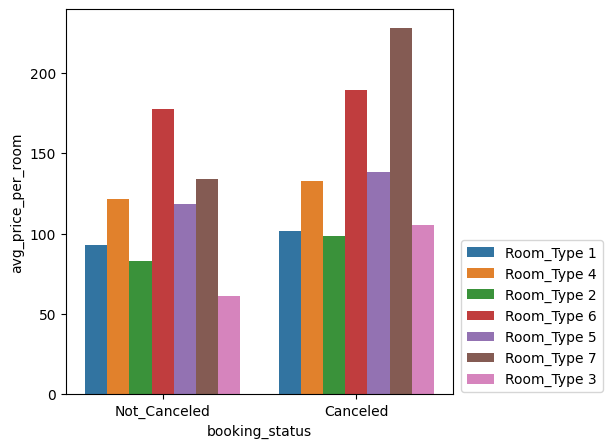

In [14]:
# booking status based on the avg price of the room while looking at the room type reserved
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'room_type_reserved');
plt.legend(bbox_to_anchor=(1.02, 0.40), loc='upper left', borderaxespad=0)

room type 6 is almost unaffected by the price. room type 7, most canceled as long as it was above about $130 averagely

It goes without saying that the price of the room has a high effect on whether a room will be booked or not.

<ipython-input-15-3ae9b697d9f3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'type_of_meal_plan');


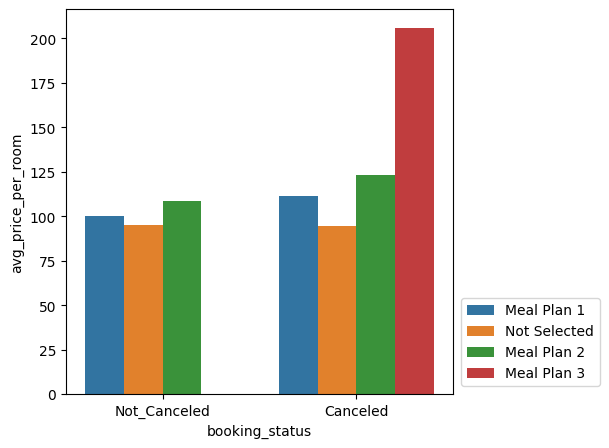

In [15]:
# Looking at the booking status with the price og the room and the meal plan.
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'type_of_meal_plan');
plt.legend(bbox_to_anchor=(1.02, 0.25), loc='upper left', borderaxespad=0)

Everyone who signed up for mealplan 3 cancelled their booking. this can mean that if someone calls and wants meal plan 3, they are most likely not going to book.

In [16]:
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 1, 'Canceled':0})
df['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

<Axes: >

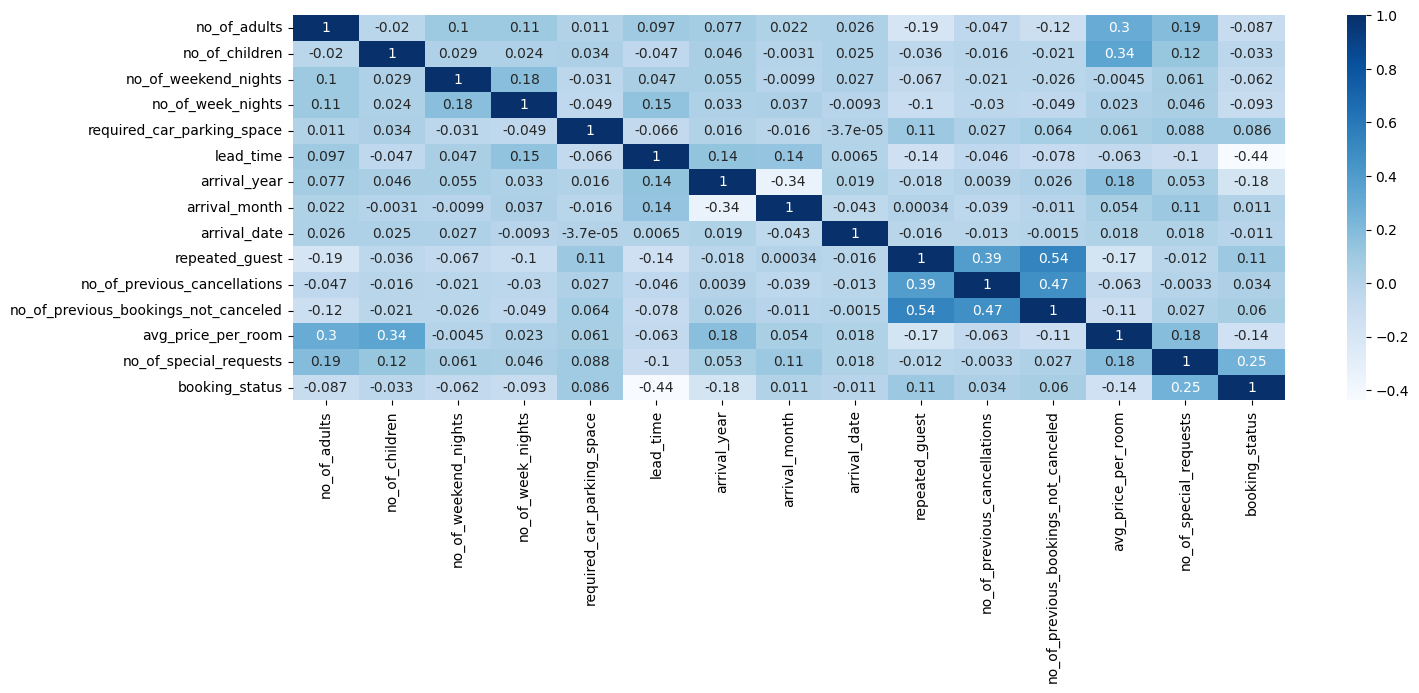

In [17]:
# Plotting a heatmap to see the correlation
plt.figure(figsize = (16,5))
sns.heatmap((df.corr()), cmap = 'Blues', annot = True)

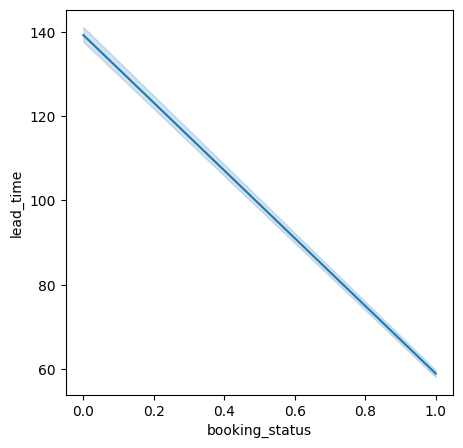

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(x = 'booking_status', y = 'lead_time', data = df);

It is clear that as the lead time increases, the chances of cancellation are high. lead time being the time between making a reservation and actually  checking in

<ipython-input-19-84a6ea2b14bf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'no_of_children', y = 'avg_price_per_room', data = df, ci = None);


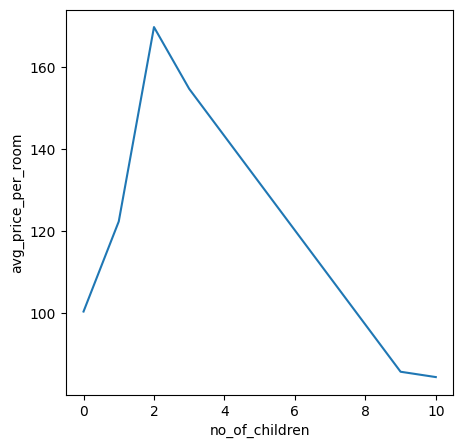

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(x = 'no_of_children', y = 'avg_price_per_room', data = df, ci = None);

In [ ]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

**create two visuals that demonstrate key findings of interest to a stakeholder**

<ipython-input-31-1e6f129bb0c1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x = 'repeated_guest', y = 'no_of_previous_cancellations', data = df, ci = None);
<ipython-input-31-1e6f129bb0c1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'repeated_guest', y = 'no_of_previous_bookings_not_canceled', data = df, ci = None);


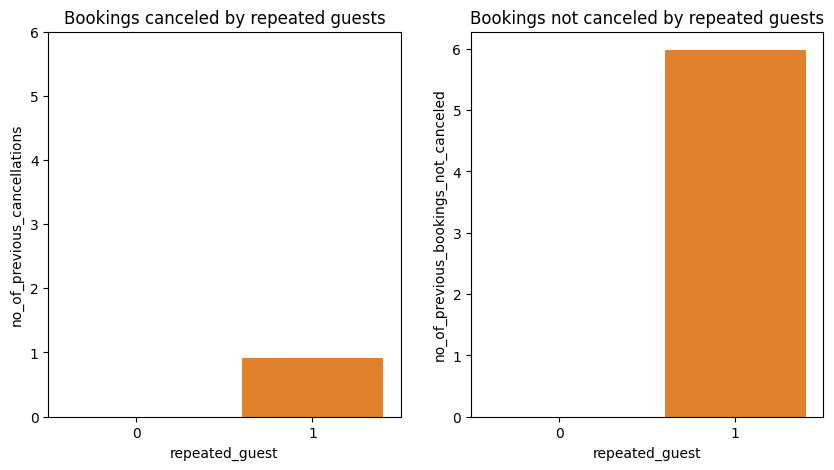

In [ ]:
plt.figure(figsize=(10,5)) #setting the size of the figures
# subplot 1
plt.subplot(1, 2, 1);
g = sns.barplot(x = 'repeated_guest', y = 'no_of_previous_cancellations', data = df, ci = None);
plt.title('Bookings canceled by repeated guests', fontsize = 12);
g.set_ylim(0, 6)
# subplot 2
plt.subplot(1, 2, 2);
sns.barplot(x = 'repeated_guest', y = 'no_of_previous_bookings_not_canceled', data = df, ci = None);
plt.title('Bookings not canceled by repeated guests', fontsize = 12);


We can see that repeated guests usually book again and again and therefore these are people that as a hotel, you should look to find ways to make sure that the service is great and these customers book again every time.

<ipython-input-19-c1652dcfb6fc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1);
<ipython-input-19-c1652dcfb6fc>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.barplot(x = 'no_of_adults', y = 'avg_price_per_room', data = df, ci = None);
<ipython-input-19-c1652dcfb6fc>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  c = sns.barplot(x = 'no_of_children', y = 'avg_price_per_room', data = df, ci = None);


Text(0.5, 1.0, 'Room price vs Number of children')

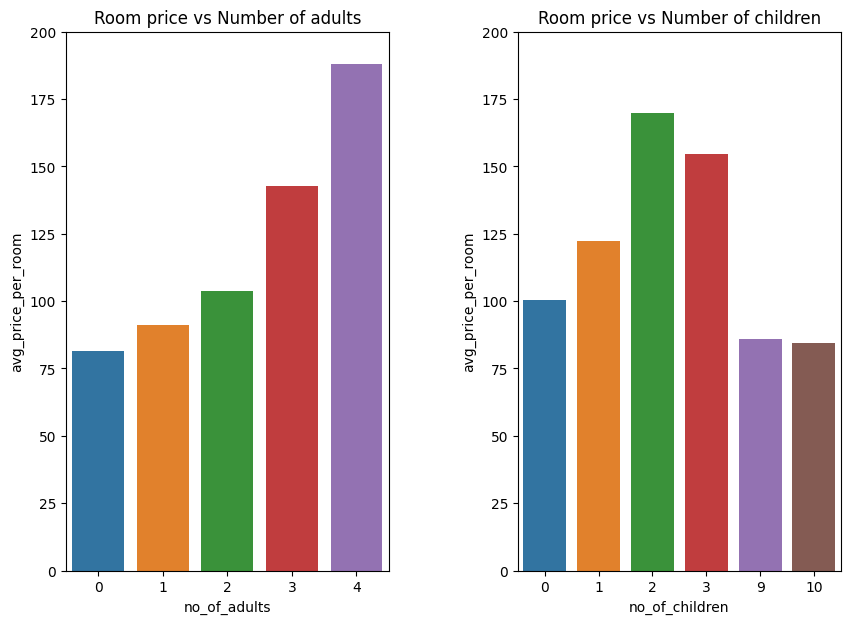

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(1, 2, 1);
a = sns.barplot(x = 'no_of_adults', y = 'avg_price_per_room', data = df, ci = None);
a.set_ylim(0,200)
plt.title('Room price vs Number of adults')
plt.subplot(1,2,2)
c = sns.barplot(x = 'no_of_children', y = 'avg_price_per_room', data = df, ci = None);
c.set_ylim(0,200)
plt.title('Room price vs Number of children')

From the above graphs, we see that as the number of adults increases. so does the price of the room.

But for the number of children, an increase in the number of children doesn't necessarily mean an increase in price, and this means that it is mostly dependent on the adults who are booking along with the children to determine which room and therefore the price. That said, it goes back to whoever is making the booking on the hotel's side to share options in the interests of the hotel.

**model development**


I am going to use three classification models;

1. Logistic Regression

2. Random Forests

3. Gradient Bossting

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [21]:
# Feature engineering to reduce the number of features and also remove redundant ones
# Joining the number of children and number of adults
df['total_no_of_people'] = df['no_of_adults'] + df['no_of_children']
# dropping the joined columns and the booking ID column
df = df.drop(columns = ['no_of_adults', 'no_of_children', 'Booking_ID'])
df.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_no_of_people
0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1,2
1,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1,2
2,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0,1
3,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0,2
4,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0,2


<ipython-input-22-eec741aeab59>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'total_no_of_people', y = 'avg_price_per_room', data = df, ci = None);


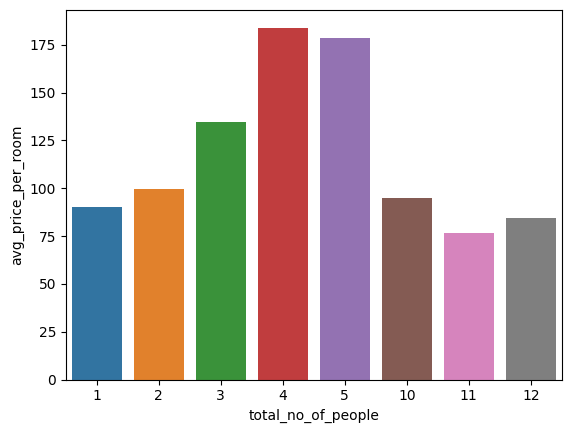

In [22]:
# visualization of total number of people vs avg price of room to get more insight into this relationship
sns.barplot(x = 'total_no_of_people', y = 'avg_price_per_room', data = df, ci = None);

From the above diagram, as the number of people increases, the price also goes up until4-5 people. Once it's above 5, the price of room tends to go down. This means that a group booking is likely to opt for low cost rooms.

In [23]:
# changing the data types of year month and date so that we can onehotencode them
new_data_types = {'arrival_year': 'object', 'arrival_month':'object', 'arrival_date':'object'}
df = df.astype(new_data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_weekend_nights                  36275 non-null  int64  
 1   no_of_week_nights                     36275 non-null  int64  
 2   type_of_meal_plan                     36275 non-null  object 
 3   required_car_parking_space            36275 non-null  int64  
 4   room_type_reserved                    36275 non-null  object 
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  object 
 7   arrival_month                         36275 non-null  object 
 8   arrival_date                          36275 non-null  object 
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [24]:
# Assign X and y
X = df.drop(columns = 'booking_status')
y = df['booking_status']

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer, make_column_selector

In [42]:
# Model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)


In [43]:
# Instantiate the scaler and ohe
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse = False)

In [44]:
# 
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')


In [45]:
# create pipelines for the num and cat selctors
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

In [46]:
# creating tuples that will go into the column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176b1c130>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176c84760>)])

In [47]:
# instantiate the Logistic Regression model
logreg = LogisticRegression()
lr_model = make_pipeline(preprocessor, logreg)

In [48]:
# fit the model on the training data
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176b1c130>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176c84760>)])),
                ('logisticregression', LogisticRegression())])

In [49]:
# make predictions with the model
y_pred = lr_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2971
           1       0.84      0.89      0.86      6098

    accuracy                           0.81      9069
   macro avg       0.79      0.77      0.78      9069
weighted avg       0.81      0.81      0.81      9069



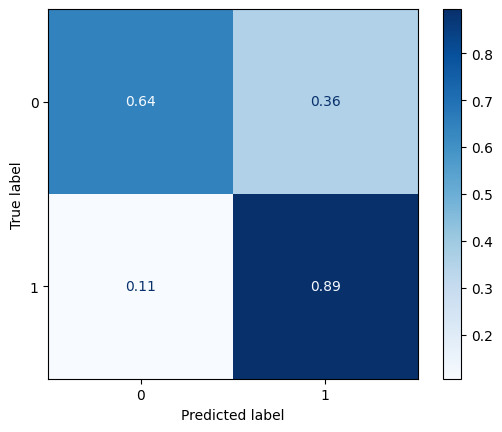

In [51]:
# CONFUSION MATRIC
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, normalize = 'true' , cmap = 'Blues');

In [52]:
# hyperparameter tuning the logistic regression model
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
lg_param_grid = {'C': [0.001, 0.1, 1, 10], 
                 'max_iter': [50,100,150], 
                 'penalty': ['l1','l2'], 
                 'solver': ['lbfgs','sag','saga']}

In [ ]:
# Using Gridsearch CV to hyperparameter tuning
model = GridSearchCV(logreg, lg_param_grid, cv = 5)
new_lr_pipe = make_pipeline(preprocessor, model)
best_lr_model = new_lr_pipe.fit(X_train, y_train)

In [58]:
# getting the best parameters
model.best_params_

{'C': 0.1, 'max_iter': 150, 'penalty': 'l1', 'solver': 'saga'}

In [59]:
# fitiing the model
best_lr_model = model.best_estimator_
best_lr_pipe  = make_pipeline(preprocessor, best_lr_model)
best_lr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176b1c130>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176c84760>)])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=150, penalty='l1',
                                    solver='saga'))])

In [60]:
# prediction using the new logreg model
y_pred2 = best_lr_pipe.predict(X_test)

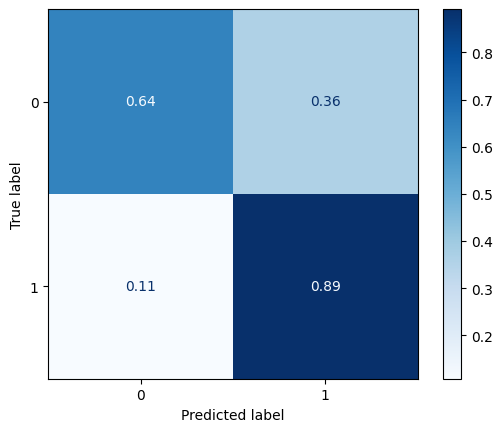

In [61]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap ='Blues', normalize = 'true');

In [62]:
# Classification report for the new Logreg model
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      2971
           1       0.84      0.89      0.86      6098

    accuracy                           0.81      9069
   macro avg       0.79      0.77      0.78      9069
weighted avg       0.81      0.81      0.81      9069



With hyperparameter tuning the logistic regression model, there hasn't been any change to the predictions. The model is not predicting too well on the negative class.

**USING RANDOM FOREST**

In [63]:
# instantiate the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_pipe = make_pipeline(preprocessor, rfc)
rfc_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176b1c130>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176c84760>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [65]:
# make predictions with the model
rfc_y_pred = rfc_pipe.predict(X_test)

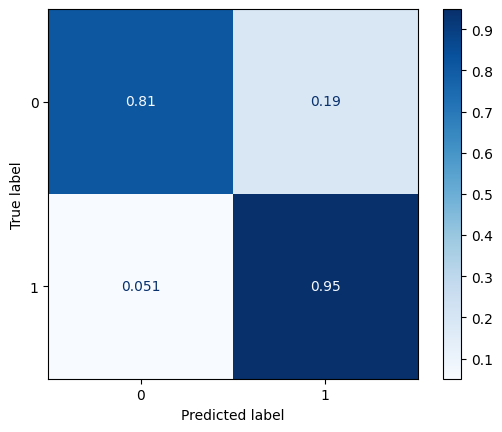

In [66]:
# confusion matrix for the RFC
ConfusionMatrixDisplay.from_predictions(y_test, rfc_y_pred, cmap ='Blues', normalize = 'true');

In [68]:
# classification report for the RandomForest classifier
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2971
           1       0.91      0.95      0.93      6098

    accuracy                           0.90      9069
   macro avg       0.90      0.88      0.89      9069
weighted avg       0.90      0.90      0.90      9069



**USING EXTREME GRADIENT BOOSTING**

In [70]:
# Using the XGB classifier adn fiting it on the training data.
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3176b1c130>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <skle...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [71]:
# making predictions on our model
xgb_y_pred = xgb_pipe.predict(X_test)

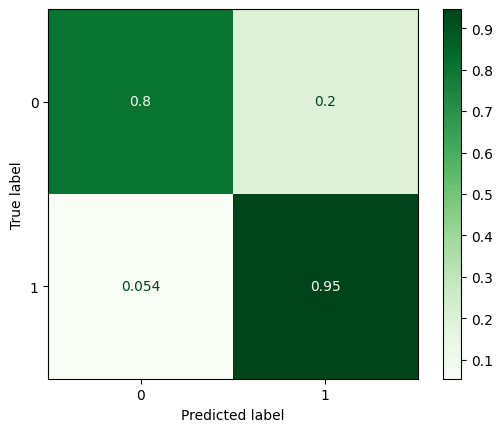

In [73]:
# confusion matrix for XGB model
ConfusionMatrixDisplay.from_predictions(y_test, xgb_y_pred, cmap ='Greens', normalize = 'true');

In [74]:
# Classification report for the XGB model
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2971
           1       0.91      0.95      0.93      6098

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069



I am not hyperparameter tuning the Random Forest classifier and the XGB model because they are performing very well on both the precision and recall which is important for our case. I am more interested in predicting a client who confirms their booking while also predicting fairly well on the client who is likely to cancel their booking. 

I am choosing the Random Forest Classifier because it has the best F1 score where there's a bot of balance btween recall and precision. and it is going to be the production model